# MNIST

每张图片有28x28个像素点构成，每个像素点用一个灰度值表示，这里是将28x28的像素展开为一个一维的行向量（每行784个值）。图片标签为one-hot编码：0-9。

https://www.jianshu.com/p/050750a1bb5e

In [3]:
import struct

label_file = './data/mnist/t10k-labels-idx1-ubyte'
image_file = './data/mnist/train-images-idx3-ubyte'

In [4]:
with open(label_file, 'rb') as f:
    data = f.read()

data[:4]  ## 检查是不是label trainning file (0801 -> 2049)

b'\x00\x00\x08\x01'

In [5]:
struct.unpack('>ii', data[:8])  # 2049为检验码，10000为数据条数

(2049, 10000)

In [6]:
import numpy as np

labels = np.asarray(bytearray(data[8:]), dtype='uint8')  # 二进制数组变数字数组

labels.shape

(10000,)

In [7]:
with open(image_file, 'rb') as f:
    image = f.read()

magic_number, item_count, piexl_x, piexl_y = struct.unpack('>iiii', image[:16]) # 2051类型校验，60000条，28行28列
magic_number, item_count, piexl_x, piexl_y 

(2051, 60000, 28, 28)

In [8]:
pixels = image[16:]

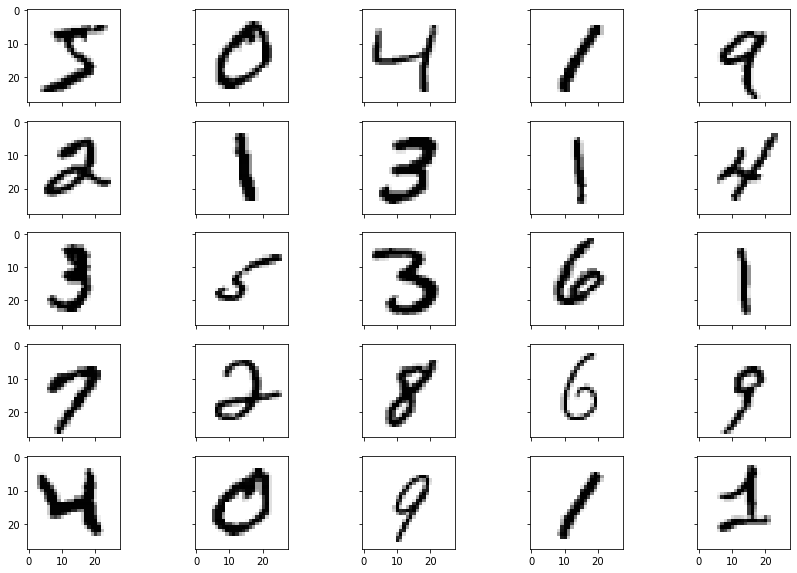

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 5, ncols = 5, sharex='all', sharey='all')
fig.subplots_adjust(top=2,right=2)
ax = axes.flatten()
size = piexl_x * piexl_y       # image size
for i in range(25):
    start   = i * size
    end     = start + size
    imgdata = pixels[start:end]
    imgarray = bytearray(imgdata)
#     imgarr  = np.asarray(bytearray(imgdata), dtype=np.uint8).reshape(28, 28)
    # asarray会转成10进制，原生16进制，都能用于显示图片
    start = 0
    imgarr = []
    while start < size:
        imgarr.append(imgarray[start:start + piexl_x])
        start += piexl_x
    ax[i].imshow(imgarr, 'gray_r') # _r表示反转色标

# opencv

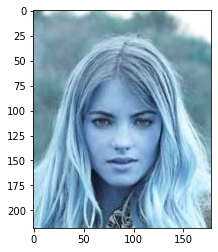

In [10]:
import cv2

img = cv2.imread('./data/my_data/my_img/000019.jpg')
plt.imshow(img)

# cv2.imshow('img', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

(218, 178, 3) 116412 uint8
[131 168 206] 131


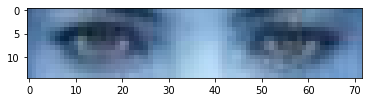

In [11]:
print(img.shape, img.size, img.dtype)
print(img[100, 100], img[100, 100, 0])

eyes = img[105:120, 53:125]
img2 = eyes
plt.imshow(img2)

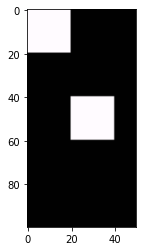

In [12]:
img3 = np.ones((100, 50, 3), np.uint8)
img3[40:60,20:40] = np.asarray([255, 2555, 255])
img3[0:20,0:20] = img3[40:60,20:40]
plt.imshow(img3)